# ETL e EDA - Carga Verificada ONS (2022-2025)

Este notebook implementa um processo de ETL (Extract, Transform, Load) e EDA (Exploratory Data Analysis) nos dados abertos de carga verificada do ONS para o Subsistema Nordeste.

## 1. Importação de Bibliotecas

In [2]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✓ Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


## 2. ETL - Extract, Transform, Load

### 2.1 Extract - Extração dos Dados da API

In [4]:
def extrair_dados_ons(dat_inicio, dat_fim, cod_areacarga='NE'):
    """
    Extrai dados de carga verificada da API do ONS
    
    Args:
        dat_inicio (str): Data inicial no formato 'YYYY-MM-DD'
        dat_fim (str): Data final no formato 'YYYY-MM-DD'
        cod_areacarga (str): Código da área de carga (padrão: 'NE' - Nordeste)
    
    Returns:
        pd.DataFrame: DataFrame com os dados extraídos
    """
    URL = "https://apicarga.ons.org.br/prd"
    endpoint = "cargaverificada"
    
    try:
        print(f"Extraindo dados de {dat_inicio} até {dat_fim} para área {cod_areacarga}...")
        
        # Converter strings para datetime
        date_start = datetime.strptime(dat_inicio, '%Y-%m-%d')
        date_end = datetime.strptime(dat_fim, '%Y-%m-%d')
        
        # Lista para armazenar todos os DataFrames
        all_data = []
        
        # Iterar dia a dia do período solicitado
        current_date = date_start
        total_days = (date_end - date_start).days + 1
        
        print(f"Total de dias a serem extraídos: {total_days}")
        
        # Barra de progresso simples
        progress_interval = max(1, total_days // 20)  # Mostrar progresso a cada 5%
        
        while current_date <= date_end:
            # Parâmetros da requisição
            params = {
                'cod_areacarga': cod_areacarga,
                'dat_inicio': current_date.strftime('%Y-%m-%d'),
                'dat_fim': current_date.strftime('%Y-%m-%d')
            }
            
            # Fazer requisição
            url = f"{URL}/{endpoint}"
            response = requests.get(url, params=params, timeout=30)
            response.raise_for_status()
            
            # Processar resposta JSON
            data = response.json()
            
            # Verificar se há dados
            if data and len(data) > 0:
                df_day = pd.DataFrame(data)
                all_data.append(df_day)
            
            # Mostrar progresso
            days_processed = (current_date - date_start).days + 1
            if days_processed % progress_interval == 0 or current_date == date_end:
                percent = (days_processed / total_days) * 100
                print(f"Progresso: {percent:.1f}% ({days_processed}/{total_days} dias)")
            
            # Avançar para o próximo dia
            current_date += timedelta(days=1)
        
        # Concatenar todos os dados
        if all_data:
            df = pd.concat(all_data, ignore_index=True)
            print(f"\n✓ Dados extraídos com sucesso! Total de registros: {len(df)}")
            return df
        else:
            print(f"\n✗ Nenhum dado encontrado para o período especificado")
            return None
    
    except requests.exceptions.RequestException as e:
        print(f"✗ Erro na requisição HTTP: {e}")
        return None
    except Exception as e:
        print(f"✗ Erro ao extrair dados: {e}")
        return None

# Extrair dados de 2022 a 2025
df_raw = extrair_dados_ons('2022-01-01', '2025-12-31', 'NE')

if df_raw is not None:
    print(f"\nDimensões do dataset: {df_raw.shape}")
    print(f"\nPrimeiras linhas:")
    display(df_raw.head())

Extraindo dados de 2022-01-01 até 2025-12-31 para área NE...
Total de dias a serem extraídos: 1461
Progresso: 5.0% (73/1461 dias)
Progresso: 5.0% (73/1461 dias)
Progresso: 10.0% (146/1461 dias)
Progresso: 10.0% (146/1461 dias)
Progresso: 15.0% (219/1461 dias)
Progresso: 15.0% (219/1461 dias)
Progresso: 20.0% (292/1461 dias)
Progresso: 20.0% (292/1461 dias)
Progresso: 25.0% (365/1461 dias)
Progresso: 25.0% (365/1461 dias)
Progresso: 30.0% (438/1461 dias)
Progresso: 30.0% (438/1461 dias)
Progresso: 35.0% (511/1461 dias)
Progresso: 35.0% (511/1461 dias)
Progresso: 40.0% (584/1461 dias)
Progresso: 40.0% (584/1461 dias)
Progresso: 45.0% (657/1461 dias)
Progresso: 45.0% (657/1461 dias)
Progresso: 50.0% (730/1461 dias)
Progresso: 50.0% (730/1461 dias)
Progresso: 55.0% (803/1461 dias)
Progresso: 55.0% (803/1461 dias)
Progresso: 60.0% (876/1461 dias)
Progresso: 60.0% (876/1461 dias)
Progresso: 65.0% (949/1461 dias)
Progresso: 65.0% (949/1461 dias)
Progresso: 70.0% (1022/1461 dias)
Progresso: 70

,cod_areacarga,din_atualizacao,dat_referencia,din_referenciautc,val_cargaglobal,val_cargaglobalcons,val_cargaglobalsmmgd,val_cargasupervisionada,val_carganaosupervisionada,val_cargammgd,val_consistencia
0,NE,2023-05-04T10:44:34.619Z,2022-01-01,2022-01-01T03:30:00.000Z,10208.68,10208.68,10208.68,9322.78,885.90,0.00,0.00
1,NE,2023-05-04T10:44:34.619Z,2022-01-01,2022-01-01T04:00:00.000Z,10259.56,10259.56,10259.56,9384.88,874.68,0.00,0.00
2,NE,2023-05-04T10:44:34.619Z,2022-01-01,2022-01-01T04:30:00.000Z,10298.72,10298.72,10298.72,9427.88,870.84,0.00,0.00
3,NE,2023-05-04T10:44:34.619Z,2022-01-01,2022-01-01T05:00:00.000Z,10368.67,10368.67,10368.67,9506.33,862.34,0.00,0.00
4,NE,2023-05-04T10:44:34.619Z,2022-01-01,2022-01-01T05:30:00.000Z,10367.00,10367.00,10367.00,9505.04,861.96,0.00,0.00


### 2.2 Transform - Transformação e Limpeza dos Dados

In [10]:
def transformar_dados(df):
    """
    Transforma os dados extraídos:
    - Converte tipos de dados
    - Transforma timezone de UTC para horário de Brasília (subtraindo 3 horas)
    - Filtra dados do período 01/01/2022 a 14/11/2025
    - Cria features temporais
    
    Args:
        df (pd.DataFrame): DataFrame bruto
    
    Returns:
        pd.DataFrame: DataFrame transformado
    """
    if df is None:
        return None
    
    print("Transformando dados...")
    df_transform = df.copy()
    
    # Identificar coluna din_referenciautc
    if 'din_referenciautc' in df_transform.columns:
        print(f"Coluna de timestamp identificada: din_referenciautc")
        
        # Converter para datetime e subtrair 3 horas para horário de Brasília
        df_transform['din_referencia'] = pd.to_datetime(df_transform['din_referenciautc']).dt.tz_localize(None) - pd.Timedelta(hours=3)
        
        
        print(f"✓ Timestamps convertidos de UTC para horário de Brasília (UTC-3)")

    
    # Filtrar dados de 01/01/2022 a 14/11/2025
    if 'din_referencia' in df_transform.columns:
        data_inicial = pd.to_datetime('2022-01-01')
        data_final = pd.to_datetime('2025-11-14 23:59:59')
        
        registros_antes = len(df_transform)
        df_transform = df_transform[
            (df_transform['din_referencia'] >= data_inicial) & 
            (df_transform['din_referencia'] <= data_final)
        ]
        registros_depois = len(df_transform)
        
        print(f"✓ Dados filtrados: {data_inicial.strftime('%d/%m/%Y')} a {data_final.strftime('%d/%m/%Y')}")
        print(f"  Registros removidos: {registros_antes - registros_depois}")
        
        # Criar features temporais
        df_transform['ano'] = df_transform['din_referencia'].dt.year
        df_transform['mes'] = df_transform['din_referencia'].dt.month
        df_transform['dia'] = df_transform['din_referencia'].dt.day
        df_transform['hora'] = df_transform['din_referencia'].dt.hour
        df_transform['dia_semana'] = df_transform['din_referencia'].dt.dayofweek
        df_transform['nome_dia_semana'] = df_transform['din_referencia'].dt.day_name()
        df_transform['trimestre'] = df_transform['din_referencia'].dt.quarter
        df_transform['dia_ano'] = df_transform['din_referencia'].dt.dayofyear
        
        print(f"✓ Features temporais criadas")
    
    # Converter colunas numéricas (que podem estar como string por causa do separador decimal)
    for col in df_transform.columns:
        if col not in ['din_referencia', 'nome_dia_semana'] and df_transform[col].dtype == 'object':
            try:
                # Tentar converter, substituindo vírgula por ponto se necessário
                df_transform[col] = df_transform[col].str.replace(',', '.').astype(float)
            except:
                pass
    
    # Remover linhas com timestamp inválido
    if 'din_referencia' in df_transform.columns:
        df_transform = df_transform.dropna(subset=['din_referencia'])
    
    print(f"✓ Transformação concluída! Registros após filtragem: {len(df_transform)}")
    
    return df_transform.drop(columns=['din_atualizacao', 'dat_referencia', 'din_referenciautc'], axis=1, errors='ignore')

# Aplicar transformações
df_transformed = transformar_dados(df_raw)

if df_transformed is not None:
    print(f"\nInformações do dataset transformado:")
    print(df_transformed.info())

Transformando dados...
Coluna de timestamp identificada: din_referenciautc
✓ Timestamps convertidos de UTC para horário de Brasília (UTC-3)
✓ Dados filtrados: 01/01/2022 a 14/11/2025
  Registros removidos: 49
✓ Features temporais criadas
✓ Transformação concluída! Registros após filtragem: 67871

Informações do dataset transformado:
<class 'pandas.core.frame.DataFrame'>
Index: 67871 entries, 0 to 67870
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   cod_areacarga               67871 non-null  object        
 1   val_cargaglobal             67871 non-null  float64       
 2   val_cargaglobalcons         67871 non-null  float64       
 3   val_cargaglobalsmmgd        67871 non-null  float64       
 4   val_cargasupervisionada     67871 non-null  float64       
 5   val_carganaosupervisionada  67871 non-null  float64       
 6   val_cargammgd               67871 non-null  

In [11]:
df_transformed

,cod_areacarga,val_cargaglobal,val_cargaglobalcons,val_cargaglobalsmmgd,val_cargasupervisionada,val_carganaosupervisionada,val_cargammgd,val_consistencia,din_referencia,ano,mes,dia,hora,dia_semana,nome_dia_semana,trimestre,dia_ano
0,NE,10208.68,10208.68,10208.68,9322.78,885.90,0.00,0.00,2022-01-01 00:30:00,2022,1,1,0,5,Saturday,1,1
1,NE,10259.56,10259.56,10259.56,9384.88,874.68,0.00,0.00,2022-01-01 01:00:00,2022,1,1,1,5,Saturday,1,1
2,NE,10298.72,10298.72,10298.72,9427.88,870.84,0.00,0.00,2022-01-01 01:30:00,2022,1,1,1,5,Saturday,1,1
3,NE,10368.67,10368.67,10368.67,9506.33,862.34,0.00,0.00,2022-01-01 02:00:00,2022,1,1,2,5,Saturday,1,1
4,NE,10367.00,10367.00,10367.00,9505.04,861.96,0.00,0.00,2022-01-01 02:30:00,2022,1,1,2,5,Saturday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67866,NE,15493.15,15493.15,15463.63,14698.74,764.89,29.52,0.00,2025-11-14 21:30:00,2025,11,14,21,4,Friday,4,318
67867,NE,15781.32,15781.32,15751.80,14987.77,764.03,29.52,0.00,2025-11-14 22:00:00,2025,11,14,22,4,Friday,4,318
67868,NE,15753.76,15753.76,15724.24,14962.51,761.73,29.52,0.00,2025-11-14 22:30:00,2025,11,14,22,4,Friday,4,318
67869,NE,15667.39,15667.39,15637.87,14880.58,757.29,29.52,0.00,2025-11-14 23:00:00,2025,11,14,23,4,Friday,4,318


### 2.3 Load - Visualização dos Dados Processados

In [12]:
# Amostra dos dados transformados
if df_transformed is not None:
    print("=" * 80)
    print("DADOS TRANSFORMADOS - AMOSTRA")
    print("=" * 80)
    display(df_transformed.head(10))
    
    print("\n" + "=" * 80)
    print("ESTATÍSTICAS DESCRITIVAS")
    print("=" * 80)
    display(df_transformed.describe())
    
    # Verificar valores ausentes
    print("\n" + "=" * 80)
    print("VALORES AUSENTES")
    print("=" * 80)
    missing = df_transformed.isnull().sum()
    missing_pct = (missing / len(df_transformed)) * 100
    missing_df = pd.DataFrame({
        'Coluna': missing.index,
        'Valores Ausentes': missing.values,
        'Percentual (%)': missing_pct.values
    })
    display(missing_df[missing_df['Valores Ausentes'] > 0])

DADOS TRANSFORMADOS - AMOSTRA


,cod_areacarga,val_cargaglobal,val_cargaglobalcons,val_cargaglobalsmmgd,val_cargasupervisionada,val_carganaosupervisionada,val_cargammgd,val_consistencia,din_referencia,ano,mes,dia,hora,dia_semana,nome_dia_semana,trimestre,dia_ano
0,NE,10208.68,10208.68,10208.68,9322.78,885.90,0.00,0.00,2022-01-01 00:30:00,2022,1,1,0,5,Saturday,1,1
1,NE,10259.56,10259.56,10259.56,9384.88,874.68,0.00,0.00,2022-01-01 01:00:00,2022,1,1,1,5,Saturday,1,1
2,NE,10298.72,10298.72,10298.72,9427.88,870.84,0.00,0.00,2022-01-01 01:30:00,2022,1,1,1,5,Saturday,1,1
3,NE,10368.67,10368.67,10368.67,9506.33,862.34,0.00,0.00,2022-01-01 02:00:00,2022,1,1,2,5,Saturday,1,1
4,NE,10367.00,10367.00,10367.00,9505.04,861.96,0.00,0.00,2022-01-01 02:30:00,2022,1,1,2,5,Saturday,1,1
5,NE,10370.16,10370.16,10370.16,9514.56,855.60,0.00,0.00,2022-01-01 03:00:00,2022,1,1,3,5,Saturday,1,1
6,NE,10352.31,10352.31,10352.31,9501.92,850.39,0.00,0.00,2022-01-01 03:30:00,2022,1,1,3,5,Saturday,1,1
7,NE,10325.63,10325.63,10325.63,9482.42,843.21,0.00,0.00,2022-01-01 04:00:00,2022,1,1,4,5,Saturday,1,1
8,NE,10302.59,10302.59,10302.59,9469.38,833.21,0.00,0.00,2022-01-01 04:30:00,2022,1,1,4,5,Saturday,1,1
9,NE,10214.80,10214.80,10214.80,9389.36,825.44,0.00,0.00,2022-01-01 05:00:00,2022,1,1,5,5,Saturday,1,1



ESTATÍSTICAS DESCRITIVAS


,val_cargaglobal,val_cargaglobalcons,val_cargaglobalsmmgd,val_cargasupervisionada,val_carganaosupervisionada,val_cargammgd,val_consistencia,din_referencia,ano,mes,dia,hora,dia_semana,trimestre,dia_ano
count,67871.00,67871.00,67871.00,67871.00,67871.00,67871.00,67871.00,67871,67871.00,67871.00,67871.00,67871.00,67871.00,67871.00,67871.00
mean,12605.23,12607.28,11734.21,10966.59,767.62,871.01,2.06,2023-12-09 00:00:00,2023.45,6.35,15.65,11.50,3.00,2.46,177.85
min,7096.33,8047.05,4908.72,3791.80,226.85,0.00,-6710.85,2022-01-01 00:30:00,2022.00,1.00,1.00,0.00,0.00,1.00,1.00
25%,11635.49,11639.76,10552.58,9727.35,602.96,24.31,0.00,2022-12-20 12:15:00,2022.00,3.00,8.00,6.00,1.00,1.00,89.00
50%,12609.52,12610.29,11724.20,10975.29,759.06,53.35,0.00,2023-12-09 00:00:00,2023.00,6.00,16.00,12.00,3.00,2.00,177.00
75%,13631.45,13631.27,12995.40,12299.09,931.69,1476.38,0.00,2024-11-26 11:45:00,2024.00,9.00,23.00,17.50,5.00,3.00,266.00
max,20473.54,16450.34,18305.38,17625.97,1487.35,5692.47,5127.70,2025-11-14 23:30:00,2025.00,12.00,31.00,23.00,6.00,4.00,366.00
std,1405.21,1401.22,1781.30,1848.04,225.68,1233.51,85.57,NaN,1.10,3.37,8.80,6.92,2.00,1.10,103.02



VALORES AUSENTES


,Coluna,Valores Ausentes,Percentual (%)


## 3. EDA - Análise Exploratória de Dados

### 3.1 Identificação de Colunas de Carga

In [15]:
[col for col in df_transformed.columns if col.startswith('val_')]

['val_cargaglobal',
 'val_cargaglobalcons',
 'val_cargaglobalsmmgd',
 'val_cargasupervisionada',
 'val_carganaosupervisionada',
 'val_cargammgd',
 'val_consistencia']

In [16]:
# Identificar colunas de carga (valores de medição)
if df_transformed is not None:
    # Buscar colunas que começam com 'val_'
    colunas_carga = [col for col in df_transformed.columns if col.startswith('val_')]
    
    print("=" * 80)
    print("COLUNAS DE CARGA IDENTIFICADAS")
    print("=" * 80)
    
    if colunas_carga:
        for col in colunas_carga:
            print(f"- {col}")
        
        # Criar um DataFrame apenas com as colunas de carga para análise
        df_eda = df_transformed[['din_referencia', 'ano', 'mes', 'dia', 'hora', 
                                 'dia_semana', 'nome_dia_semana', 'trimestre'] + colunas_carga].copy()
        
        print(f"\n✓ Dataset para EDA criado com {len(colunas_carga)} colunas de carga")
        display(df_eda.head())
    else:
        print("Nenhuma coluna de carga identificada automaticamente.")
        print("\nColunas disponíveis:")
        for col in df_transformed.columns:
            print(f"- {col}")
        
        # Usar todas as colunas numéricas
        colunas_numericas = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
        colunas_carga = [col for col in colunas_numericas if col not in ['ano', 'mes', 'dia', 'hora', 'dia_semana', 'trimestre', 'dia_ano']]
        
        if colunas_carga:
            df_eda = df_transformed[['timestamp_brasilia', 'ano', 'mes', 'dia', 'hora', 
                                     'dia_semana', 'nome_dia_semana', 'trimestre'] + colunas_carga].copy()
            print(f"\n✓ Usando {len(colunas_carga)} colunas numéricas para análise")
        else:
            df_eda = df_transformed.copy()
            print("\n✓ Usando todas as colunas disponíveis")

COLUNAS DE CARGA IDENTIFICADAS
- val_cargaglobal
- val_cargaglobalcons
- val_cargaglobalsmmgd
- val_cargasupervisionada
- val_carganaosupervisionada
- val_cargammgd
- val_consistencia

✓ Dataset para EDA criado com 7 colunas de carga


,din_referencia,ano,mes,dia,hora,dia_semana,nome_dia_semana,trimestre,val_cargaglobal,val_cargaglobalcons,val_cargaglobalsmmgd,val_cargasupervisionada,val_carganaosupervisionada,val_cargammgd,val_consistencia
0,2022-01-01 00:30:00,2022,1,1,0,5,Saturday,1,10208.68,10208.68,10208.68,9322.78,885.90,0.00,0.00
1,2022-01-01 01:00:00,2022,1,1,1,5,Saturday,1,10259.56,10259.56,10259.56,9384.88,874.68,0.00,0.00
2,2022-01-01 01:30:00,2022,1,1,1,5,Saturday,1,10298.72,10298.72,10298.72,9427.88,870.84,0.00,0.00
3,2022-01-01 02:00:00,2022,1,1,2,5,Saturday,1,10368.67,10368.67,10368.67,9506.33,862.34,0.00,0.00
4,2022-01-01 02:30:00,2022,1,1,2,5,Saturday,1,10367.00,10367.00,10367.00,9505.04,861.96,0.00,0.00


### 3.2 Análise Temporal - Série Temporal

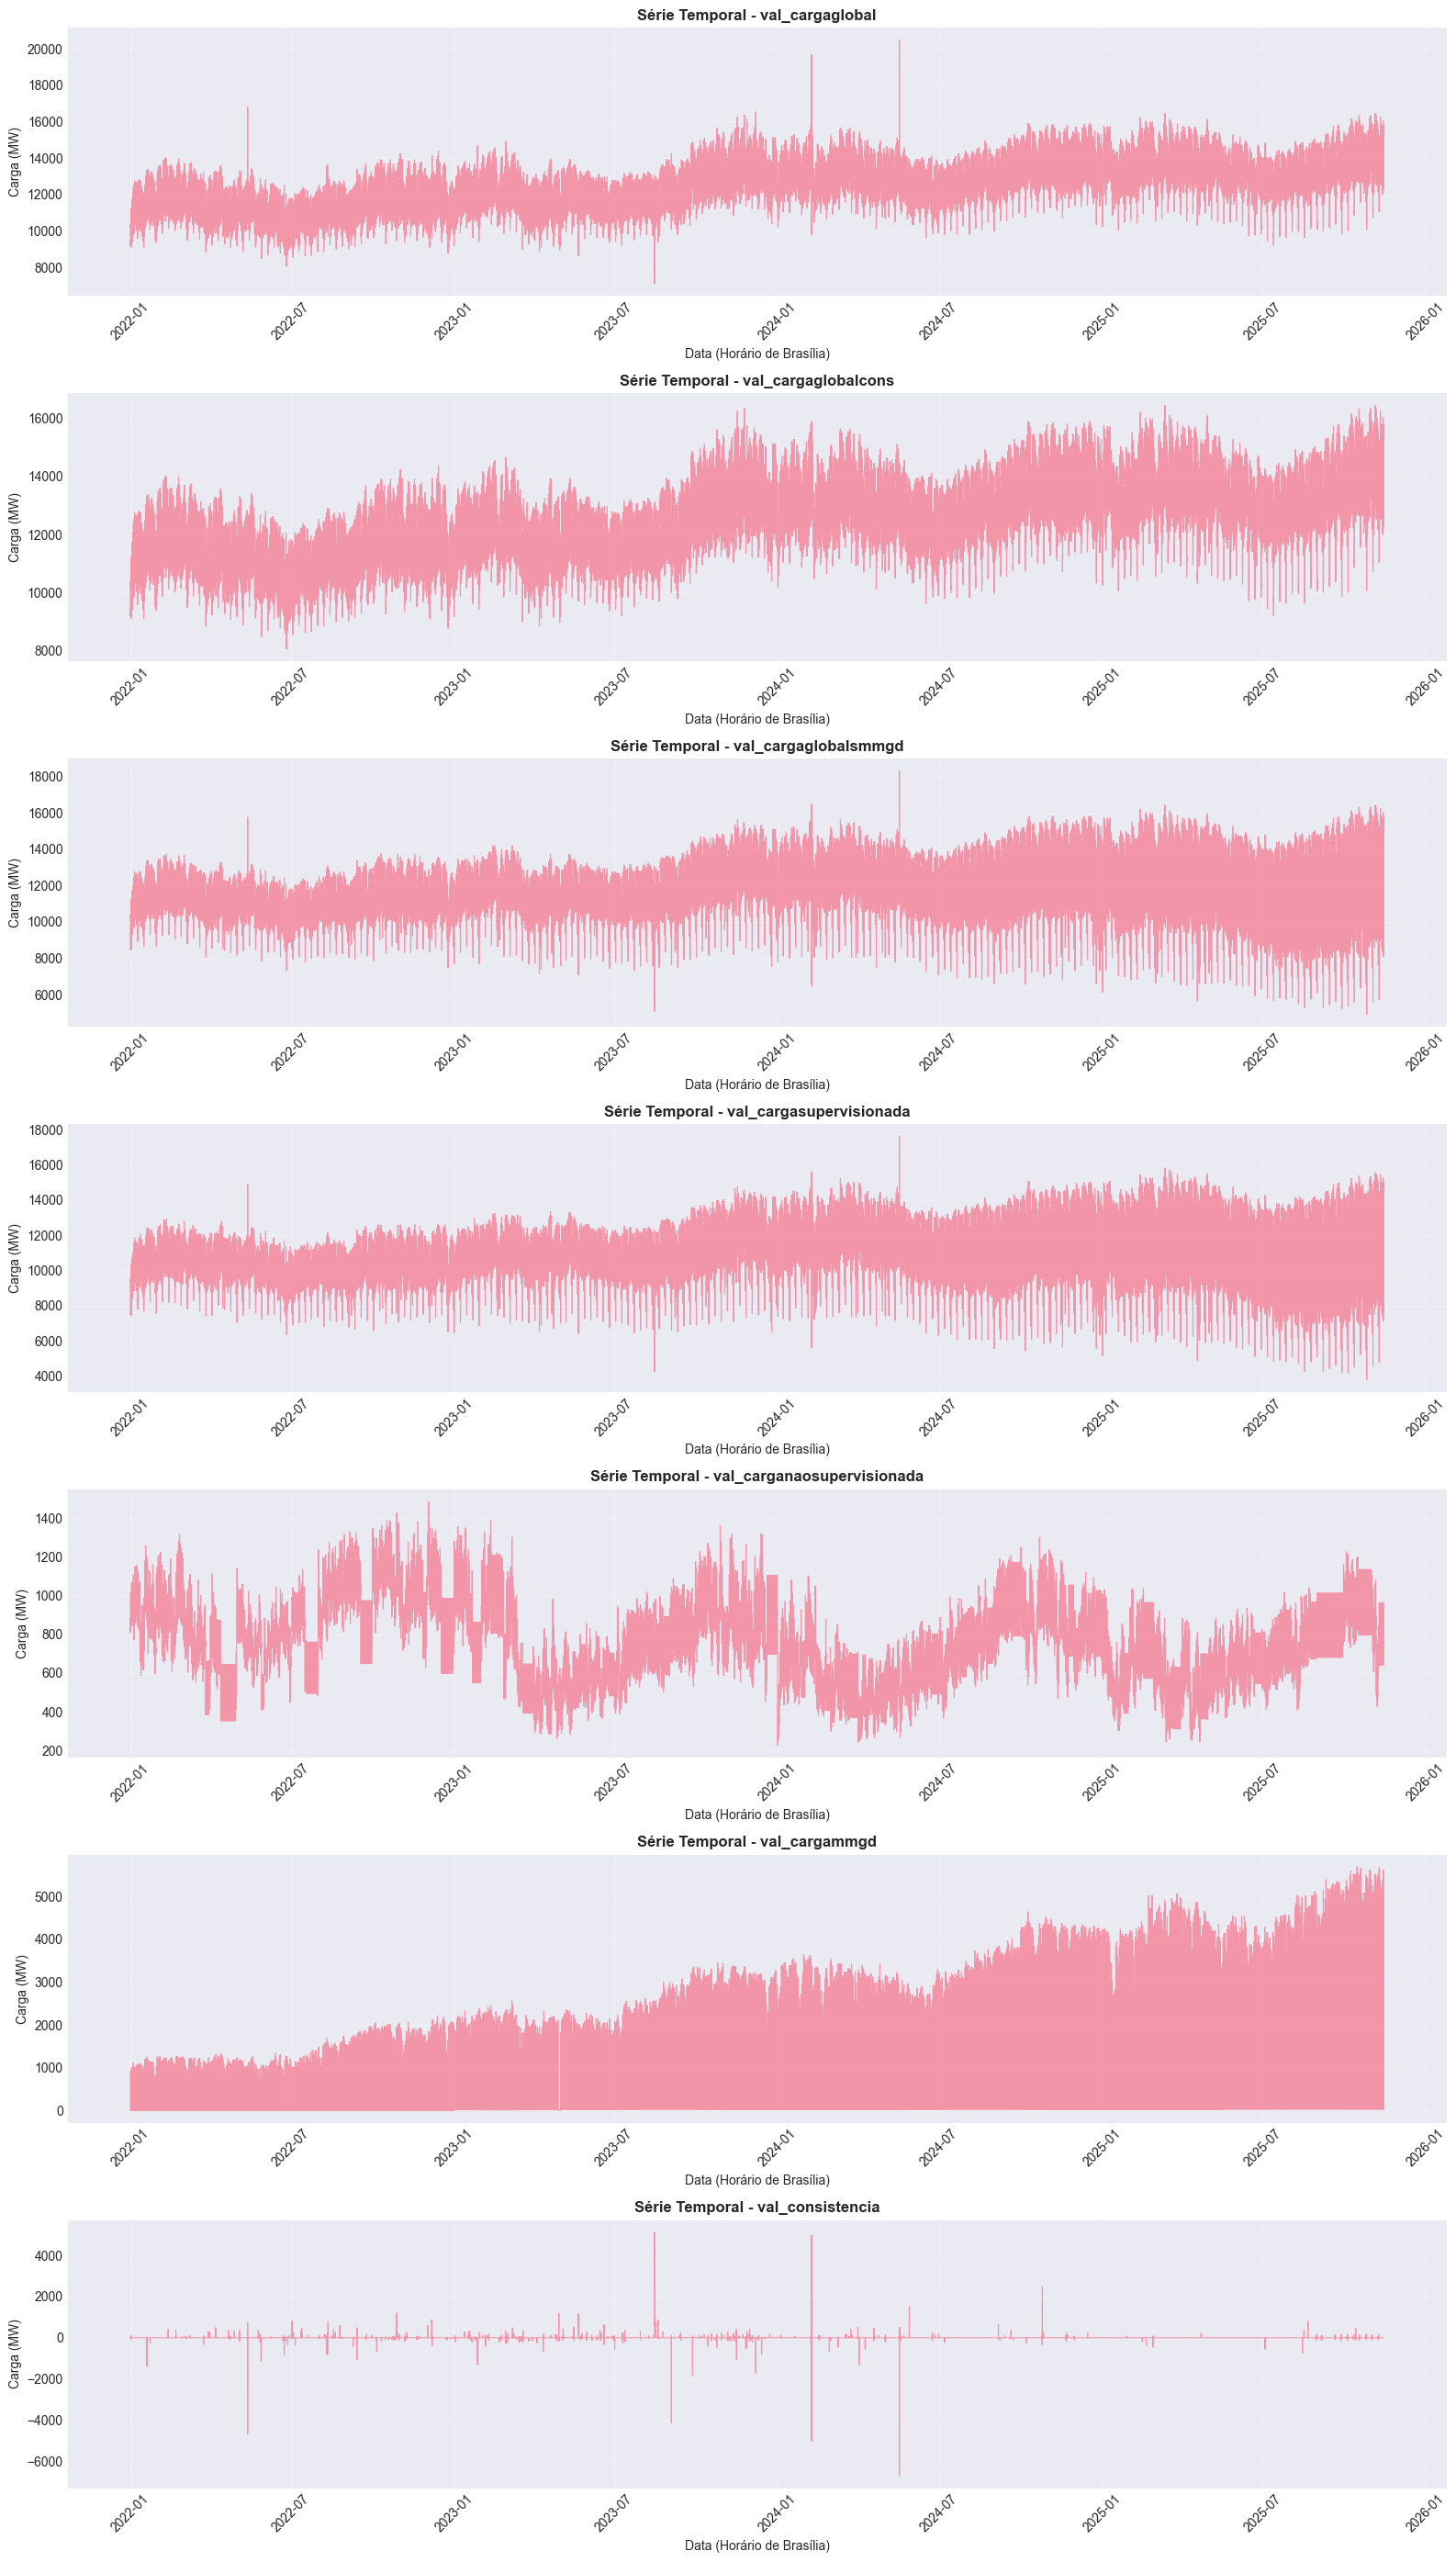

✓ Gráficos de série temporal gerados


In [21]:
# Plotar séries temporais das principais variáveis de carga
if df_eda is not None and len(colunas_carga) > 0:
    fig, axes = plt.subplots(len(colunas_carga), 1, figsize=(16, 4*len(colunas_carga)))
    
    if len(colunas_carga) == 1:
        axes = [axes]
    
    for idx, col in enumerate(colunas_carga):
        df_plot = df_eda.set_index('din_referencia')[col].dropna()
        
        axes[idx].plot(df_plot.index, df_plot.values, linewidth=0.8, alpha=0.7)
        axes[idx].set_title(f'Série Temporal - {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Data (Horário de Brasília)', fontsize=10)
        axes[idx].set_ylabel('Carga (MW)', fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Gráficos de série temporal gerados")

Os gráficos da val_cargaglobal e val_cargammgd são os mais importantes. Na carga global, pode-se verificar a carga total gerada no Subsistema Nordeste do Brasil. No gráfico da carga MMGD, observa-se o crescimento desse tipo de carga ao longo do tempo, refletindo o 'boom' da MMGD no Brasil nos últimos anos.

### 3.3 Análise por Ano

ESTATÍSTICAS POR ANO - val_cargaglobal


,Média,Mediana,Mínimo,Máximo,Desvio Padrão,Total Registros
ano,,,,,,
2022,11525.90,11625.46,8047.05,16785.85,1077.12,17519
2023,12378.37,12424.42,7096.33,16533.38,1243.41,17520
2024,13222.46,13318.80,9610.68,20473.54,1201.19,17568
2025,13393.99,13477.20,9204.51,16450.34,1247.70,15264


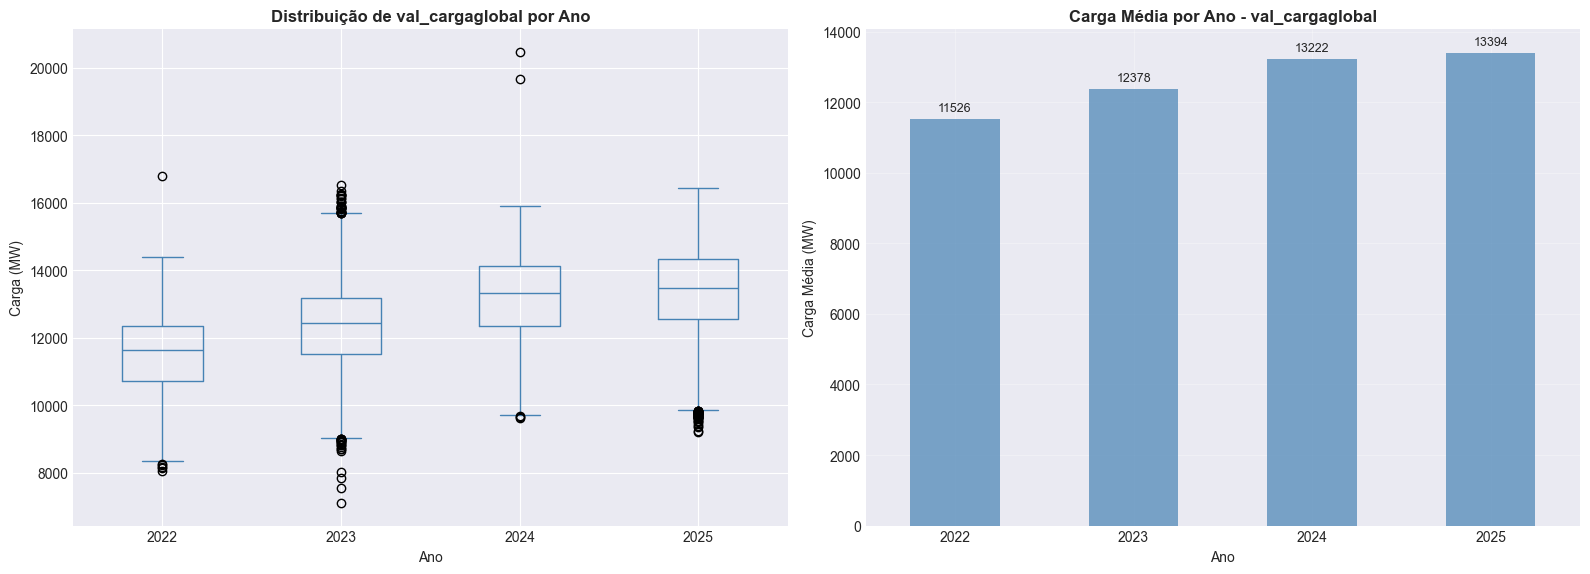

In [24]:
# Análise comparativa por ano
if df_eda is not None and len(colunas_carga) > 0:
    # Selecionar a primeira coluna de carga para análise detalhada
    col_principal = colunas_carga[0]
    
    # Estatísticas por ano
    stats_ano = df_eda.groupby('ano')[col_principal].agg([
        ('Média', 'mean'),
        ('Mediana', 'median'),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('Desvio Padrão', 'std'),
        ('Total Registros', 'count')
    ]).round(2)
    
    print("=" * 80)
    print(f"ESTATÍSTICAS POR ANO - {col_principal}")
    print("=" * 80)
    display(stats_ano)
    
    # Gráfico de boxplot por ano
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Boxplot
    df_eda.boxplot(column=col_principal, by='ano', ax=axes[0], color='steelblue')
    axes[0].set_title(f'Distribuição de {col_principal} por Ano', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Ano', fontsize=10)
    axes[0].set_ylabel('Carga (MW)', fontsize=10)
    axes[0].get_figure().suptitle('')
    
    # Gráfico de barras com média por ano
    stats_ano['Média'].plot(kind='bar', ax=axes[1], color='steelblue', alpha=0.7)
    axes[1].set_title(f'Carga Média por Ano - {col_principal}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Ano', fontsize=10)
    axes[1].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].grid(True, alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(stats_ano['Média']):
        axes[1].text(i, v + stats_ano['Média'].max() * 0.01, f'{v:.0f}', 
                    ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

### 3.4 Análise por Mês e Sazonalidade

ESTATÍSTICAS POR MÊS - val_cargaglobal


,Média,Mediana,Desvio Padrão
Jan,12567.77,12615.07,1323.33
Fev,12939.42,12954.74,1256.19
Mar,12760.32,12720.59,1396.88
Abr,12528.46,12460.77,1486.32
Mai,12422.35,12473.91,1302.61
Jun,11917.76,11934.12,1274.01
Jul,11847.06,11883.41,1187.96
Ago,12267.83,12300.68,1210.45
Set,12615.07,12671.94,1325.06
Out,13315.42,13381.38,1357.25


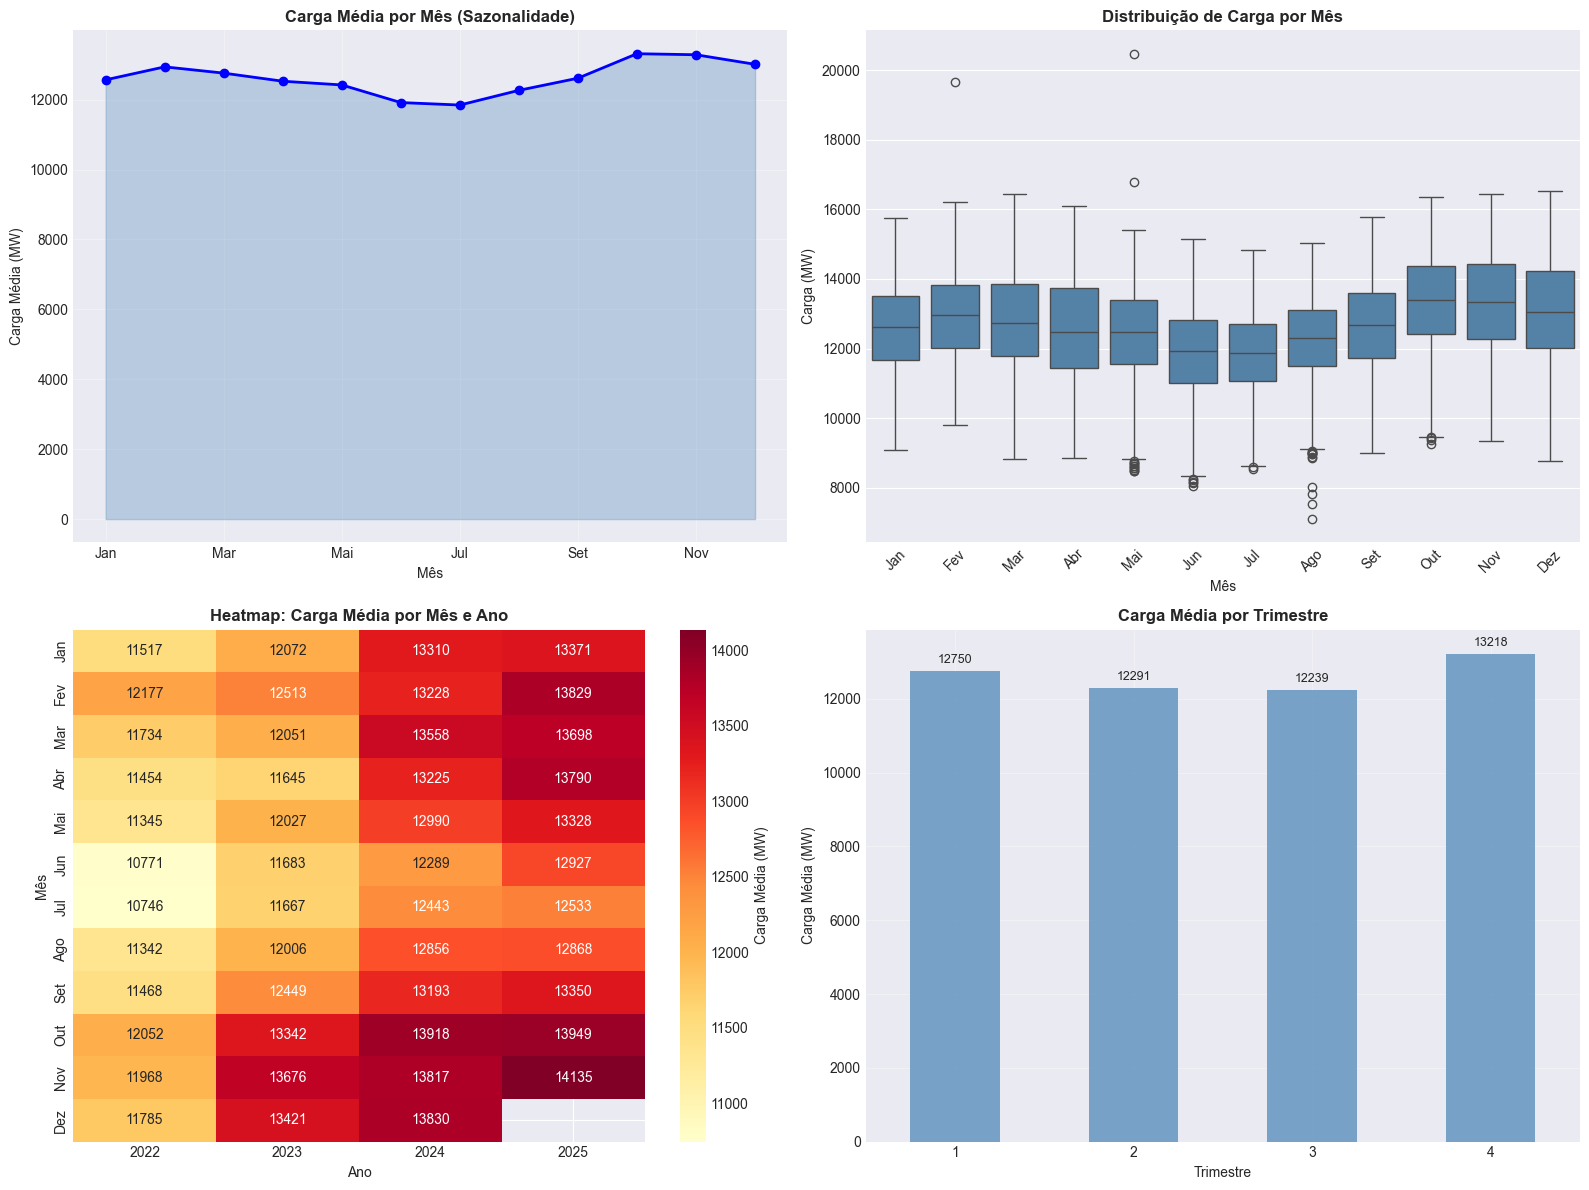

In [29]:
# Análise de sazonalidade mensal
if df_eda is not None and len(colunas_carga) > 0:
    col_principal = colunas_carga[0]
    
    # Estatísticas por mês
    stats_mes = df_eda.groupby('mes')[col_principal].agg([
        ('Média', 'mean'),
        ('Mediana', 'median'),
        ('Desvio Padrão', 'std')
    ]).round(2)
    
    # Adicionar nomes dos meses
    meses_nomes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                   'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
    stats_mes.index = [meses_nomes[i-1] for i in stats_mes.index]
    
    print("=" * 80)
    print(f"ESTATÍSTICAS POR MÊS - {col_principal}")
    print("=" * 80)
    display(stats_mes)
    
    # Gráficos
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Carga média por mês
    stats_mes['Média'].plot(kind='line', ax=axes[0, 0], marker='o', color='blue', linewidth=2)
    axes[0, 0].fill_between(range(len(stats_mes)), stats_mes['Média'], alpha=0.3, color='steelblue')
    axes[0, 0].set_title('Carga Média por Mês (Sazonalidade)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Mês', fontsize=10)
    axes[0, 0].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Boxplot por mês
    df_eda['mes_nome'] = df_eda['mes'].map(lambda x: meses_nomes[x-1])
    df_eda_sorted = df_eda.copy()
    df_eda_sorted['mes_nome'] = pd.Categorical(df_eda_sorted['mes_nome'], 
                                                categories=meses_nomes, 
                                                ordered=True)
    df_eda_sorted = df_eda_sorted.sort_values('mes_nome')
    
    sns.boxplot(data=df_eda_sorted, x='mes_nome', y=col_principal, ax=axes[0, 1], color='steelblue')
    axes[0, 1].set_title('Distribuição de Carga por Mês', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Mês', fontsize=10)
    axes[0, 1].set_ylabel('Carga (MW)', fontsize=10)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Heatmap: Mês x Ano
    pivot_mes_ano = df_eda.pivot_table(values=col_principal, 
                                        index='mes', 
                                        columns='ano', 
                                        aggfunc='mean')
    pivot_mes_ano.index = [meses_nomes[i-1] for i in pivot_mes_ano.index]
    
    sns.heatmap(pivot_mes_ano, annot=True, fmt='.0f', cmap='YlOrRd', 
                ax=axes[1, 0], cbar_kws={'label': 'Carga Média (MW)'})
    axes[1, 0].set_title('Heatmap: Carga Média por Mês e Ano', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Ano', fontsize=10)
    axes[1, 0].set_ylabel('Mês', fontsize=10)
    
    # 4. Análise por trimestre
    stats_trimestre = df_eda.groupby('trimestre')[col_principal].mean()
    stats_trimestre.plot(kind='bar', ax=axes[1, 1], color='steelblue', alpha=0.7)
    axes[1, 1].set_title('Carga Média por Trimestre', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Trimestre', fontsize=10)
    axes[1, 1].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[1, 1].tick_params(axis='x', rotation=0)
    axes[1, 1].grid(True, alpha=0.3)
    
    for i, v in enumerate(stats_trimestre):
        axes[1, 1].text(i, v + stats_trimestre.max() * 0.01, f'{v:.0f}', 
                       ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

### 3.5 Análise por Dia da Semana

ESTATÍSTICAS POR DIA DA SEMANA - val_cargaglobal


,Média,Mediana,Desvio Padrão
Segunda,12686.04,12659.52,1388.30
Terça,12919.68,12889.25,1315.53
Quarta,12941.98,12917.70,1306.02
Quinta,12954.89,12945.76,1304.18
Sexta,12906.71,12900.48,1280.43
Sábado,12300.66,12225.42,1218.60
Domingo,11526.57,11403.67,1395.00


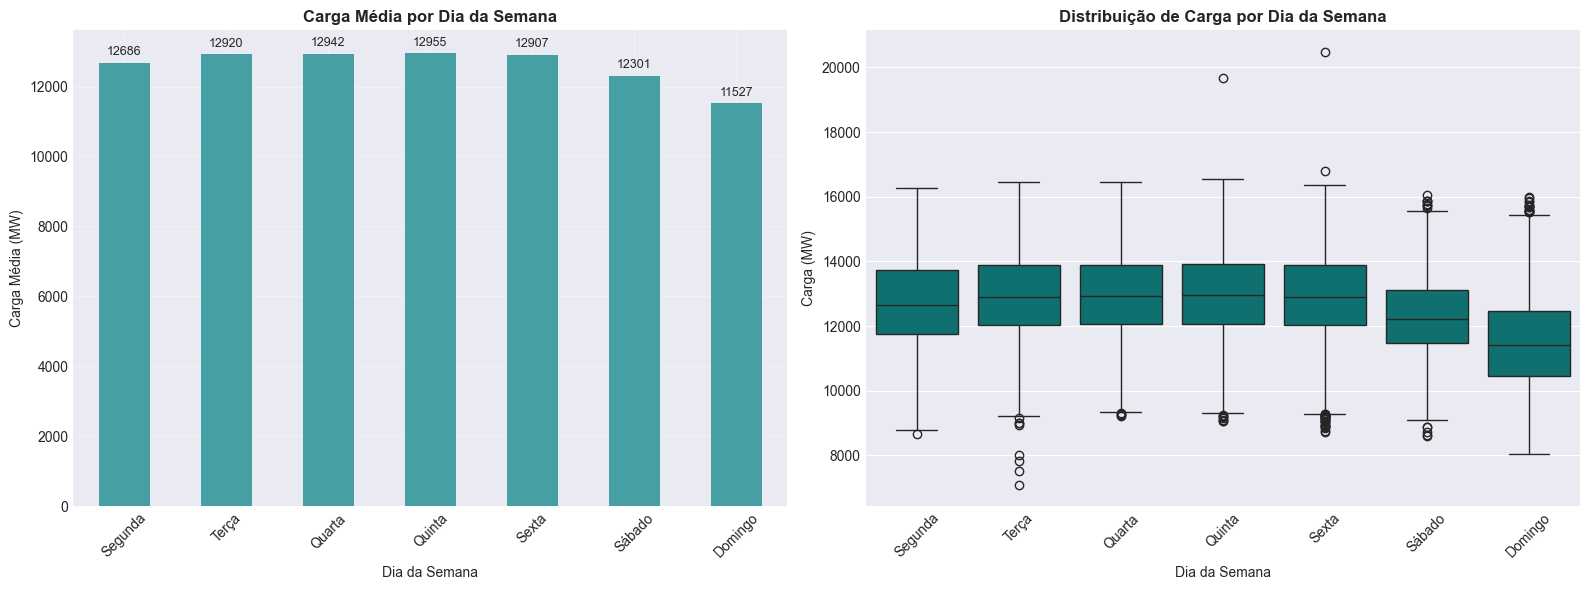

In [32]:
# Análise por dia da semana
if df_eda is not None and len(colunas_carga) > 0:
    col_principal = colunas_carga[0]
    
    # Estatísticas por dia da semana
    dias_semana_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
    
    stats_dia_semana = df_eda.groupby('dia_semana')[col_principal].agg([
        ('Média', 'mean'),
        ('Mediana', 'median'),
        ('Desvio Padrão', 'std')
    ]).round(2)
    
    stats_dia_semana.index = dias_semana_pt
    
    print("=" * 80)
    print(f"ESTATÍSTICAS POR DIA DA SEMANA - {col_principal}")
    print("=" * 80)
    display(stats_dia_semana)
    
    # Gráficos
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Carga média por dia da semana
    stats_dia_semana['Média'].plot(kind='bar', ax=axes[0], color='teal', alpha=0.7)
    axes[0].set_title('Carga Média por Dia da Semana', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Dia da Semana', fontsize=10)
    axes[0].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    for i, v in enumerate(stats_dia_semana['Média']):
        axes[0].text(i, v + stats_dia_semana['Média'].max() * 0.01, f'{v:.0f}', 
                    ha='center', va='bottom', fontsize=9)
    
    # 2. Boxplot por dia da semana
    df_eda['dia_semana_nome'] = df_eda['dia_semana'].map(lambda x: dias_semana_pt[x])
    df_eda_sorted_dia = df_eda.copy()
    df_eda_sorted_dia['dia_semana_nome'] = pd.Categorical(df_eda_sorted_dia['dia_semana_nome'], 
                                                           categories=dias_semana_pt, 
                                                           ordered=True)
    
    sns.boxplot(data=df_eda_sorted_dia, x='dia_semana_nome', y=col_principal, ax=axes[1], color='teal')
    axes[1].set_title('Distribuição de Carga por Dia da Semana', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Dia da Semana', fontsize=10)
    axes[1].set_ylabel('Carga (MW)', fontsize=10)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

### 3.6 Análise por Hora do Dia (Perfil Diário)

ESTATÍSTICAS POR HORA DO DIA - val_cargaglobal


,Média,Mediana,Mínimo,Máximo
hora,,,,
0,13001.07,12960.85,9624.23,15829.78
1,12576.99,12527.19,9367.67,15267.99
2,12258.24,12213.09,9192.60,14847.17
3,12023.41,11987.24,9078.56,14535.09
4,11871.25,11848.61,8995.56,14290.88
5,11689.37,11718.17,8954.94,14258.51
6,11146.33,11218.48,8154.67,13568.78
7,11264.32,11290.01,8047.05,14220.30
8,11856.06,11905.05,8214.02,14819.19


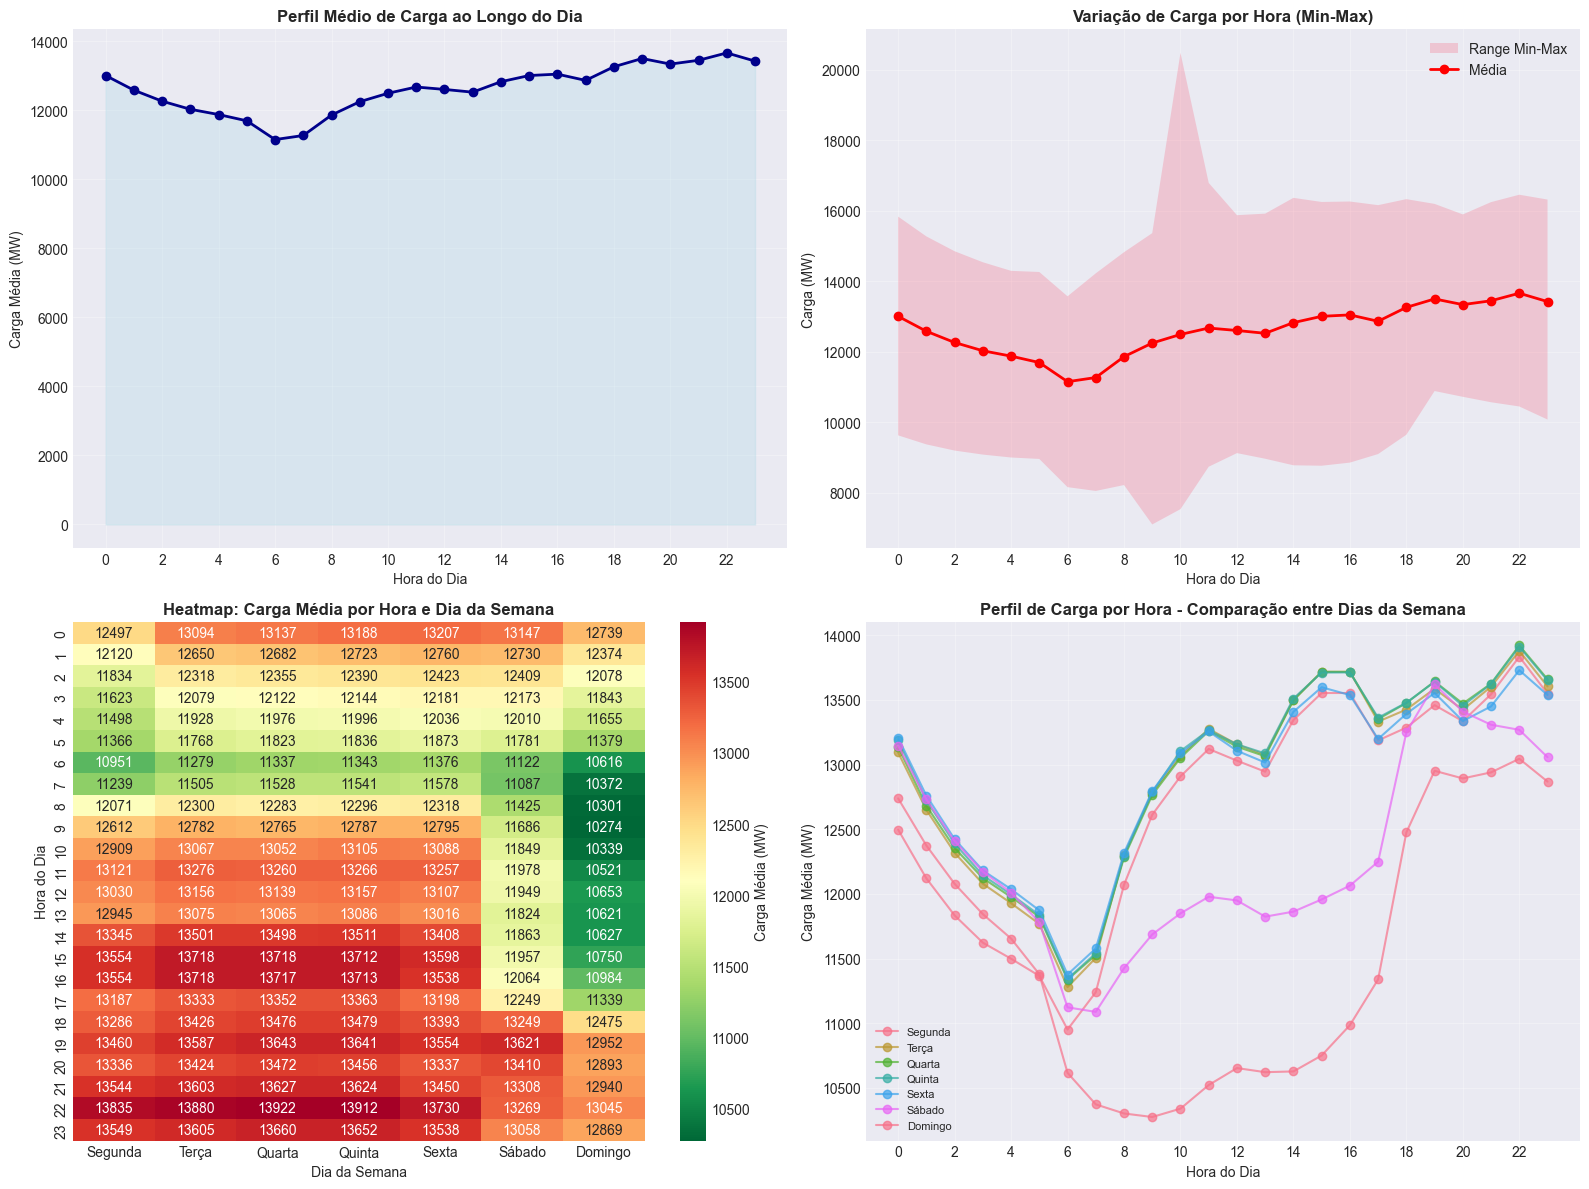

In [34]:
# Análise por hora do dia
if df_eda is not None and len(colunas_carga) > 0:
    col_principal = colunas_carga[0]
    
    # Estatísticas por hora
    stats_hora = df_eda.groupby('hora')[col_principal].agg([
        ('Média', 'mean'),
        ('Mediana', 'median'),
        ('Mínimo', 'min'),
        ('Máximo', 'max')
    ]).round(2)
    
    print("=" * 80)
    print(f"ESTATÍSTICAS POR HORA DO DIA - {col_principal}")
    print("=" * 80)
    display(stats_hora)
    
    # Gráficos
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Perfil médio diário
    stats_hora['Média'].plot(kind='line', ax=axes[0, 0], marker='o', 
                            color='darkblue', linewidth=2, markersize=6)
    axes[0, 0].fill_between(range(24), stats_hora['Média'], alpha=0.3, color='lightblue')
    axes[0, 0].set_title('Perfil Médio de Carga ao Longo do Dia', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Hora do Dia', fontsize=10)
    axes[0, 0].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[0, 0].set_xticks(range(0, 24, 2))
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Variação Min-Max por hora
    axes[0, 1].fill_between(range(24), stats_hora['Mínimo'], stats_hora['Máximo'], 
                           alpha=0.3, label='Range Min-Max')
    axes[0, 1].plot(range(24), stats_hora['Média'], color='red', 
                   linewidth=2, marker='o', label='Média', markersize=6)
    axes[0, 1].set_title('Variação de Carga por Hora (Min-Max)', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Hora do Dia', fontsize=10)
    axes[0, 1].set_ylabel('Carga (MW)', fontsize=10)
    axes[0, 1].set_xticks(range(0, 24, 2))
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Heatmap: Hora x Dia da Semana
    pivot_hora_dia = df_eda.pivot_table(values=col_principal, 
                                         index='hora', 
                                         columns='dia_semana', 
                                         aggfunc='mean')
    pivot_hora_dia.columns = dias_semana_pt
    
    sns.heatmap(pivot_hora_dia, annot=True, fmt='.0f', cmap='RdYlGn_r', 
                ax=axes[1, 0], cbar_kws={'label': 'Carga Média (MW)'})
    axes[1, 0].set_title('Heatmap: Carga Média por Hora e Dia da Semana', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Dia da Semana', fontsize=10)
    axes[1, 0].set_ylabel('Hora do Dia', fontsize=10)
    
    # 4. Perfil diário separado por dia da semana
    for dia_idx, dia_nome in enumerate(dias_semana_pt):
        df_dia = df_eda[df_eda['dia_semana'] == dia_idx]
        perfil = df_dia.groupby('hora')[col_principal].mean()
        axes[1, 1].plot(perfil.index, perfil.values, marker='o', 
                       label=dia_nome, alpha=0.7, linewidth=1.5)
    
    axes[1, 1].set_title('Perfil de Carga por Hora - Comparação entre Dias da Semana', 
                        fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Hora do Dia', fontsize=10)
    axes[1, 1].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[1, 1].set_xticks(range(0, 24, 2))
    axes[1, 1].legend(loc='best', fontsize=8)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 3.7 Análise de Distribuição e Outliers

ANÁLISE DE OUTLIERS
Q1 (25%): 11635.49 MW
Q3 (75%): 13631.45 MW
IQR: 1995.96 MW
Limite Inferior: 8641.54 MW
Limite Superior: 16625.40 MW

Total de outliers identificados: 30 (0.04%)

Exemplos de outliers:


,din_referencia,val_cargaglobal,ano,mes,dia,hora
6358,2022-05-13 11:30:00,16785.85,2022,5,13,11
7116,2022-05-29 06:30:00,8576.62,2022,5,29,6
7117,2022-05-29 07:00:00,8473.07,2022,5,29,7
7118,2022-05-29 07:30:00,8476.18,2022,5,29,7
7119,2022-05-29 08:00:00,8495.23,2022,5,29,8
7120,2022-05-29 08:30:00,8560.71,2022,5,29,8
7121,2022-05-29 09:00:00,8619.12,2022,5,29,9
8412,2022-06-25 06:30:00,8629.72,2022,6,25,6
8413,2022-06-25 07:00:00,8599.49,2022,6,25,7
8459,2022-06-26 06:00:00,8506.27,2022,6,26,6


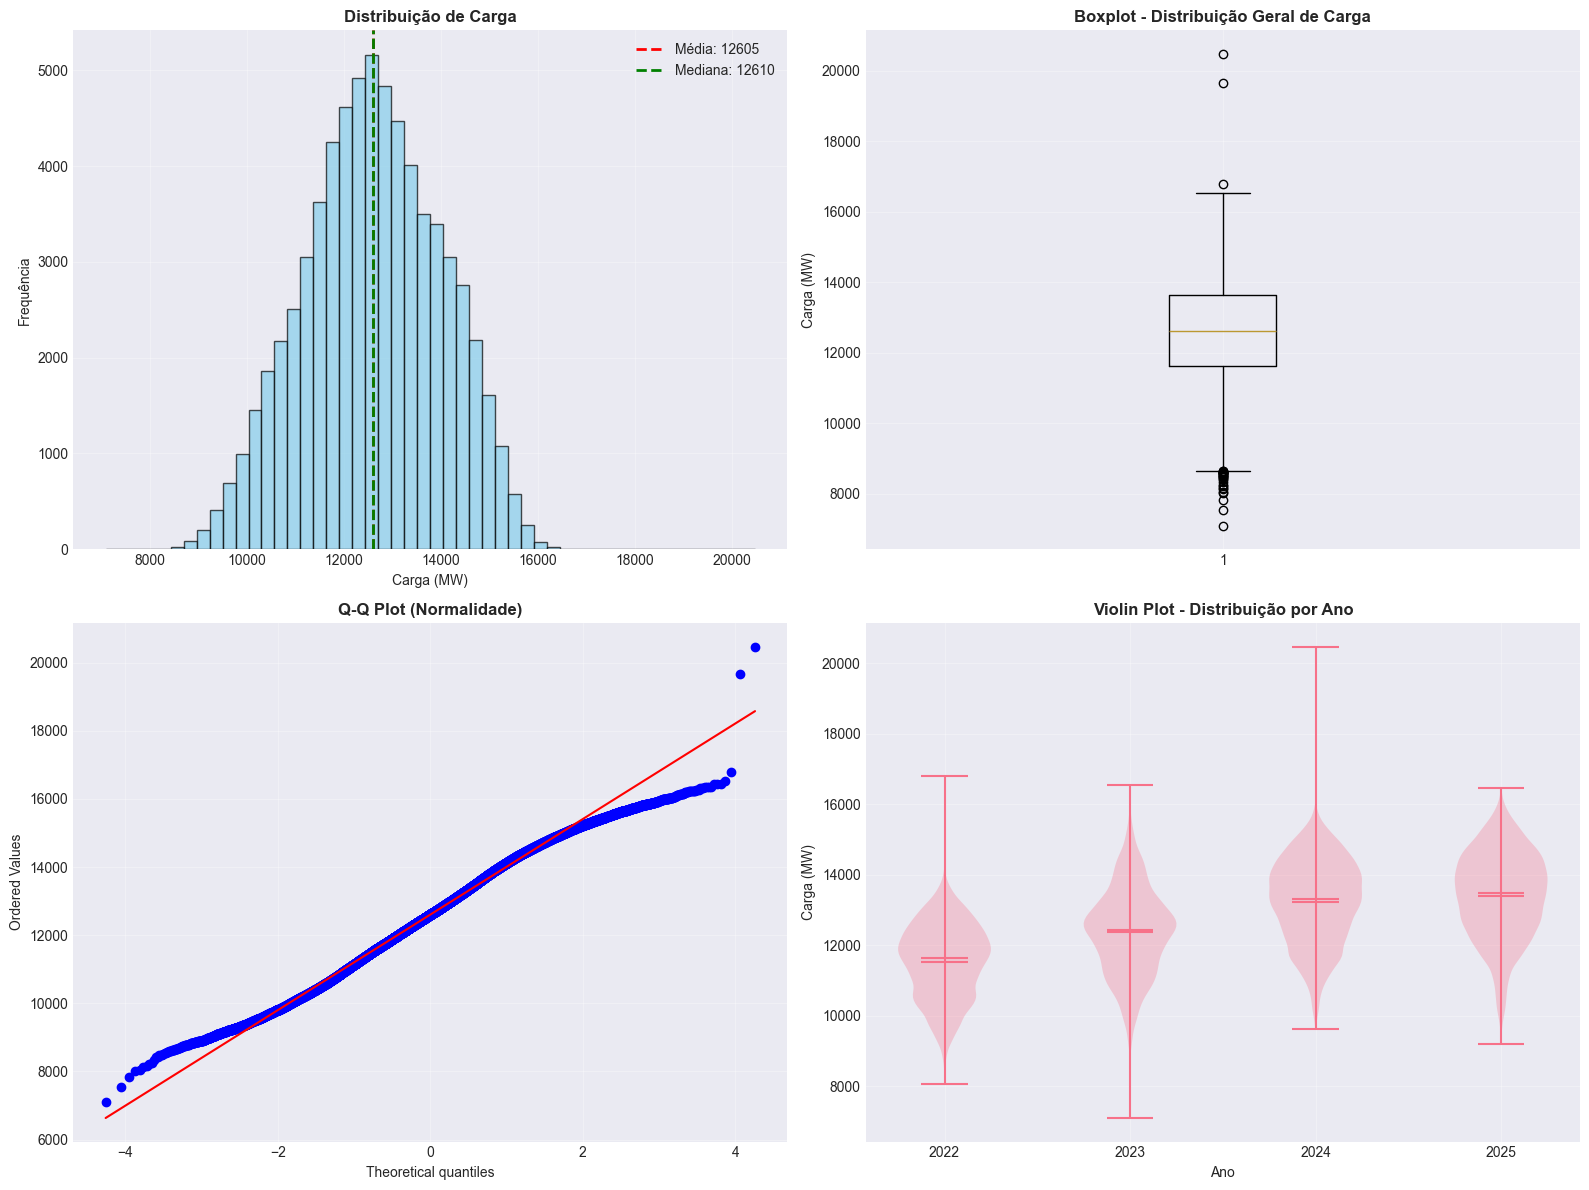

In [35]:
# Análise de distribuição e detecção de outliers
if df_eda is not None and len(colunas_carga) > 0:
    col_principal = colunas_carga[0]
    
    # Calcular quartis e IQR
    Q1 = df_eda[col_principal].quantile(0.25)
    Q3 = df_eda[col_principal].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir limites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df_eda[(df_eda[col_principal] < limite_inferior) | 
                      (df_eda[col_principal] > limite_superior)]
    
    print("=" * 80)
    print("ANÁLISE DE OUTLIERS")
    print("=" * 80)
    print(f"Q1 (25%): {Q1:.2f} MW")
    print(f"Q3 (75%): {Q3:.2f} MW")
    print(f"IQR: {IQR:.2f} MW")
    print(f"Limite Inferior: {limite_inferior:.2f} MW")
    print(f"Limite Superior: {limite_superior:.2f} MW")
    print(f"\nTotal de outliers identificados: {len(outliers)} ({len(outliers)/len(df_eda)*100:.2f}%)")
    
    if len(outliers) > 0:
        print(f"\nExemplos de outliers:")
        display(outliers[['din_referencia', col_principal, 'ano', 'mes', 'dia', 'hora']].head(10))
    
    # Gráficos
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Histograma
    axes[0, 0].hist(df_eda[col_principal].dropna(), bins=50, 
                   color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(df_eda[col_principal].mean(), color='red', 
                      linestyle='--', linewidth=2, label=f'Média: {df_eda[col_principal].mean():.0f}')
    axes[0, 0].axvline(df_eda[col_principal].median(), color='green', 
                      linestyle='--', linewidth=2, label=f'Mediana: {df_eda[col_principal].median():.0f}')
    axes[0, 0].set_title('Distribuição de Carga', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Carga (MW)', fontsize=10)
    axes[0, 0].set_ylabel('Frequência', fontsize=10)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Boxplot geral
    axes[0, 1].boxplot(df_eda[col_principal].dropna(), vert=True)
    axes[0, 1].set_title('Boxplot - Distribuição Geral de Carga', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Carga (MW)', fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Q-Q Plot
    from scipy import stats
    stats.probplot(df_eda[col_principal].dropna(), dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Normalidade)', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Violin plot por ano
    years = sorted(df_eda['ano'].unique())
    data_by_year = [df_eda[df_eda['ano'] == year][col_principal].dropna() for year in years]
    
    parts = axes[1, 1].violinplot(data_by_year, positions=range(len(years)), 
                                   showmeans=True, showmedians=True)
    axes[1, 1].set_title('Violin Plot - Distribuição por Ano', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Ano', fontsize=10)
    axes[1, 1].set_ylabel('Carga (MW)', fontsize=10)
    axes[1, 1].set_xticks(range(len(years)))
    axes[1, 1].set_xticklabels(years)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 3.8 Correlação entre Variáveis

ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS DE CARGA

Matriz de Correlação:


,val_cargaglobal,val_cargaglobalcons,val_cargaglobalsmmgd,val_cargasupervisionada,val_carganaosupervisionada,val_cargammgd,val_consistencia
val_cargaglobal,1.00,1.00,0.72,0.70,0.02,0.09,-0.08
val_cargaglobalcons,1.00,1.00,0.72,0.69,0.02,0.09,-0.02
val_cargaglobalsmmgd,0.72,0.72,1.00,0.99,-0.24,-0.62,-0.06
val_cargasupervisionada,0.70,0.69,0.99,1.00,-0.35,-0.64,-0.06
val_carganaosupervisionada,0.02,0.02,-0.24,-0.35,1.00,0.36,0.00
val_cargammgd,0.09,0.09,-0.62,-0.64,0.36,1.00,-0.00
val_consistencia,-0.08,-0.02,-0.06,-0.06,0.00,-0.00,1.00


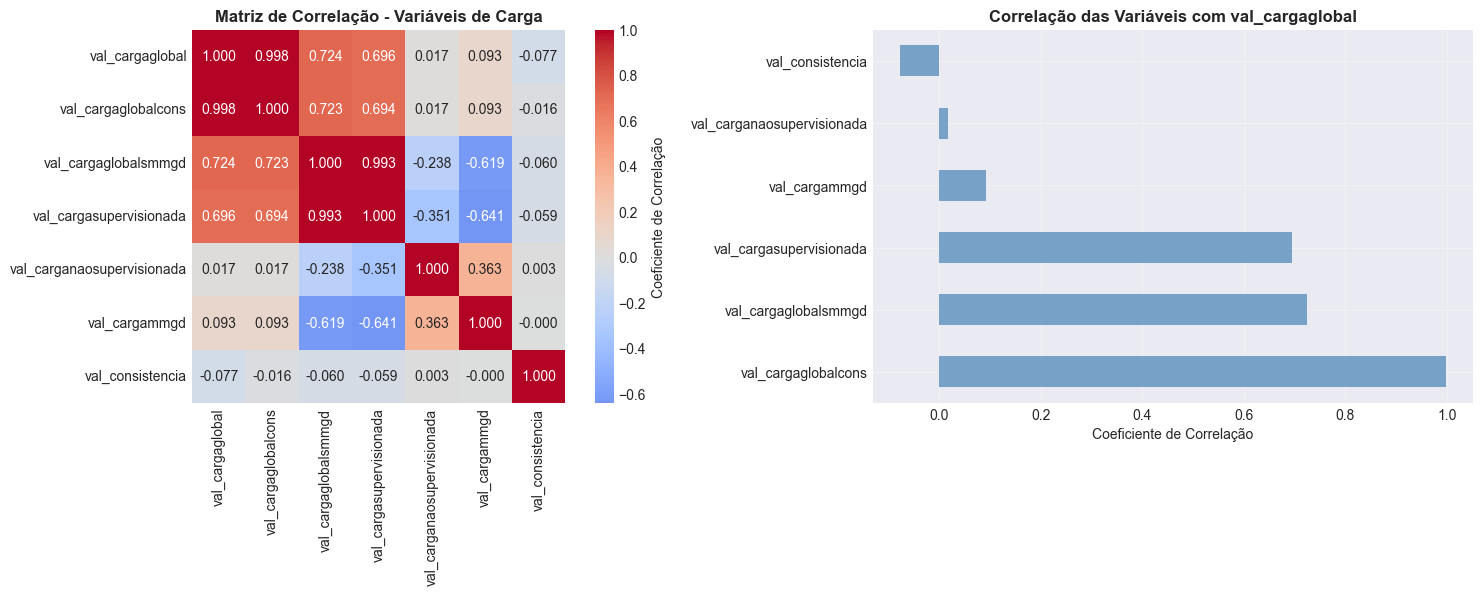

In [36]:
# Análise de correlação entre variáveis de carga
if df_eda is not None and len(colunas_carga) > 1:
    print("=" * 80)
    print("ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS DE CARGA")
    print("=" * 80)
    
    # Calcular matriz de correlação
    correlacao = df_eda[colunas_carga].corr()
    
    print("\nMatriz de Correlação:")
    display(correlacao)
    
    # Gráficos
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Heatmap de correlação
    sns.heatmap(correlacao, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, ax=axes[0],
                cbar_kws={'label': 'Coeficiente de Correlação'})
    axes[0].set_title('Matriz de Correlação - Variáveis de Carga', fontsize=12, fontweight='bold')
    
    # 2. Scatter matrix (pairplot) para as primeiras variáveis
    if len(colunas_carga) <= 4:
        # Se houver poucas variáveis, mostrar scatter plot
        from pandas.plotting import scatter_matrix
        
        scatter_data = df_eda[colunas_carga].sample(min(1000, len(df_eda)))
        scatter_matrix(scatter_data, alpha=0.5, figsize=(12, 12), 
                      diagonal='hist', ax=axes[1])
        axes[1].set_title('Scatter Matrix - Variáveis de Carga', fontsize=12, fontweight='bold')
    else:
        # Se houver muitas variáveis, mostrar barplot das correlações mais fortes
        # Pegar a primeira variável e correlações com as outras
        col_ref = colunas_carga[0]
        corr_valores = correlacao[col_ref].drop(col_ref).sort_values(ascending=False)
        
        corr_valores.plot(kind='barh', ax=axes[1], color='steelblue', alpha=0.7)
        axes[1].set_title(f'Correlação das Variáveis com {col_ref}', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Coeficiente de Correlação', fontsize=10)
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
elif df_eda is not None and len(colunas_carga) == 1:
    print("=" * 80)
    print("NOTA: Apenas uma variável de carga identificada")
    print("=" * 80)
    print(f"Variável: {colunas_carga[0]}")
    print("\nNão é possível calcular correlação com apenas uma variável.")

### 3.9 Tendências e Crescimento

ANÁLISE DE TENDÊNCIAS E CRESCIMENTO

Carga Média Anual e Crescimento:


,Ano,Carga Média (MW),Crescimento (%)
0,2022,11525.90,-
1,2023,12378.37,7.40%
2,2024,13222.46,6.82%
3,2025,13393.99,1.30%


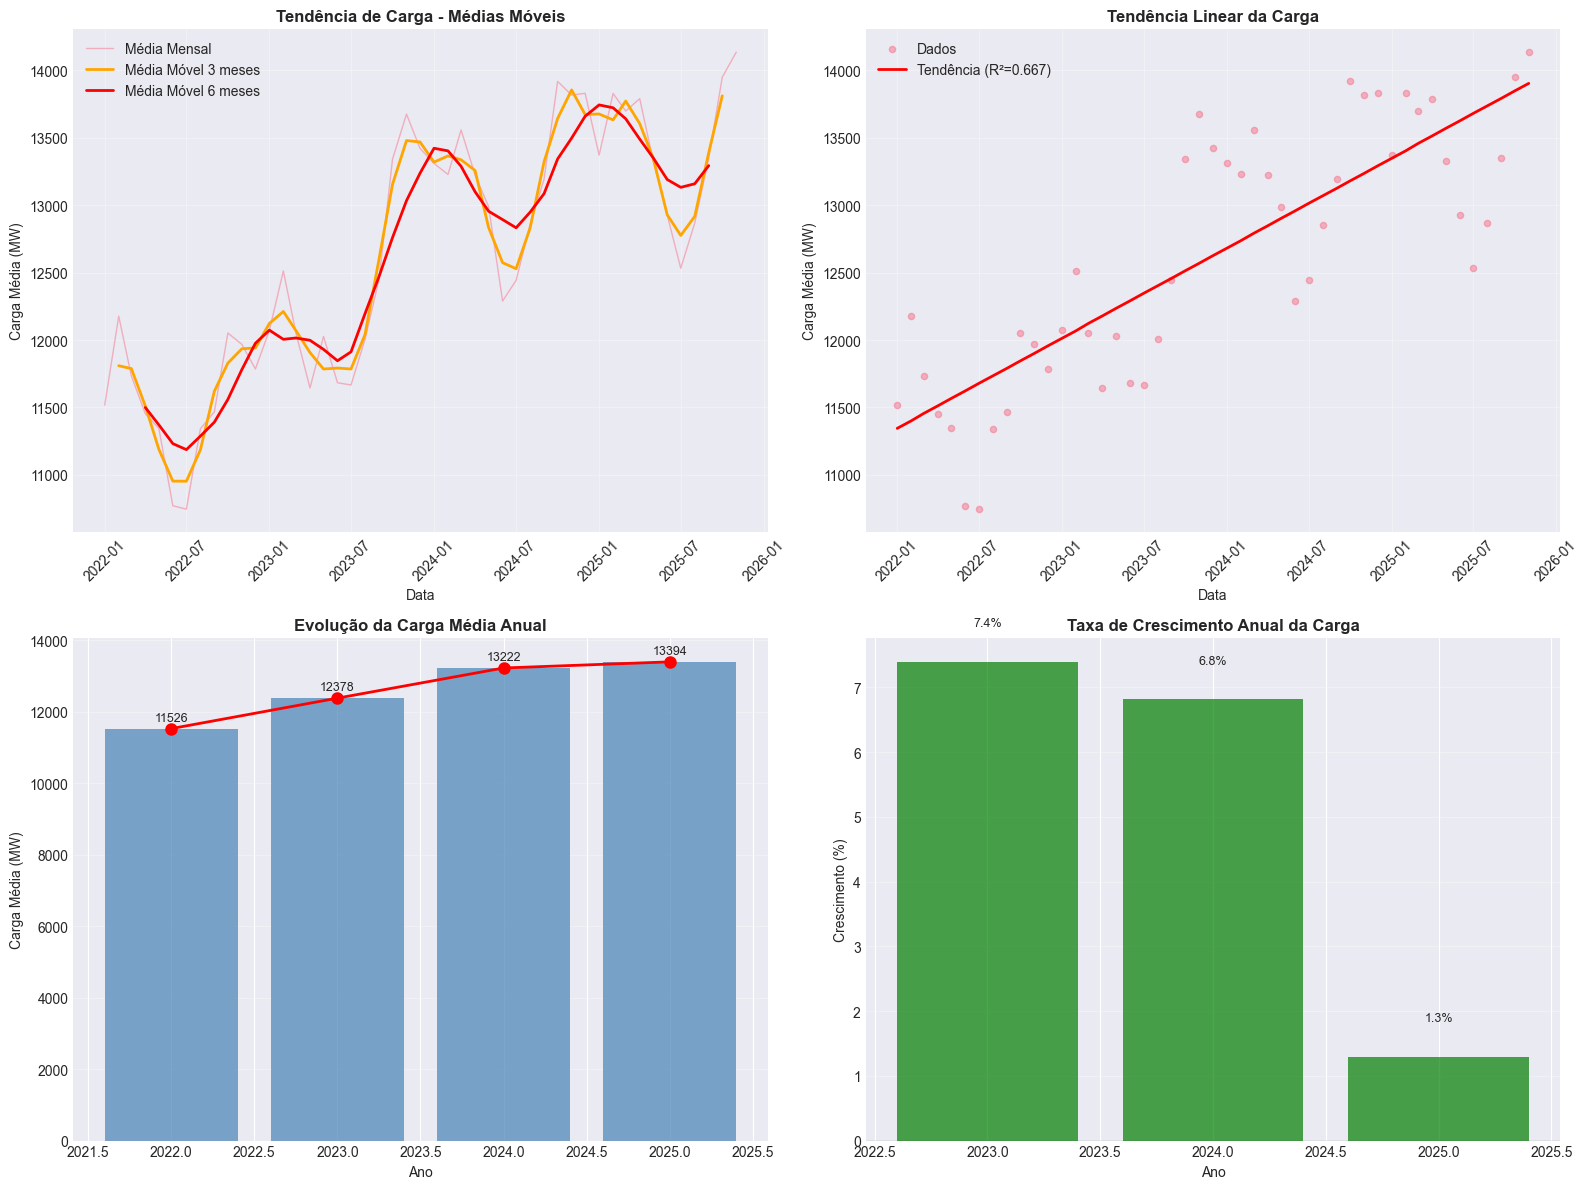


ESTATÍSTICAS DA TENDÊNCIA
Coeficiente angular (slope): 55.62 MW/mês
R² (qualidade do ajuste): 0.6674
Valor-p: 0.000000

✓ Tendência de CRESCIMENTO identificada


In [37]:
# Análise de tendências e crescimento ao longo do tempo
if df_eda is not None and len(colunas_carga) > 0:
    col_principal = colunas_carga[0]
    
    # Agrupar por mês para suavizar a série
    df_mensal = df_eda.groupby(df_eda['din_referencia'].dt.to_period('M'))[col_principal].agg([
        ('media', 'mean'),
        ('min', 'min'),
        ('max', 'max')
    ]).reset_index()
    df_mensal['din_referencia'] = df_mensal['din_referencia'].dt.to_timestamp()
    
    # Calcular média móvel
    df_mensal['media_movel_3m'] = df_mensal['media'].rolling(window=3, center=True).mean()
    df_mensal['media_movel_6m'] = df_mensal['media'].rolling(window=6, center=True).mean()
    
    # Calcular crescimento ano a ano
    crescimento_anual = df_eda.groupby('ano')[col_principal].mean()
    crescimento_pct = crescimento_anual.pct_change() * 100
    
    print("=" * 80)
    print("ANÁLISE DE TENDÊNCIAS E CRESCIMENTO")
    print("=" * 80)
    print("\nCarga Média Anual e Crescimento:")
    
    crescimento_df = pd.DataFrame({
        'Ano': crescimento_anual.index,
        'Carga Média (MW)': crescimento_anual.values,
        'Crescimento (%)': ['-'] + [f'{x:.2f}%' for x in crescimento_pct.values[1:]]
    })
    display(crescimento_df)
    
    # Gráficos
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Série temporal mensal com médias móveis
    axes[0, 0].plot(df_mensal['din_referencia'], df_mensal['media'], 
                   label='Média Mensal', alpha=0.5, linewidth=1)
    axes[0, 0].plot(df_mensal['din_referencia'], df_mensal['media_movel_3m'], 
                   label='Média Móvel 3 meses', linewidth=2, color='orange')
    axes[0, 0].plot(df_mensal['din_referencia'], df_mensal['media_movel_6m'], 
                   label='Média Móvel 6 meses', linewidth=2, color='red')
    axes[0, 0].set_title('Tendência de Carga - Médias Móveis', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Data', fontsize=10)
    axes[0, 0].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Tendência linear
    from scipy import stats as sp_stats
    x_numeric = np.arange(len(df_mensal))
    slope, intercept, r_value, p_value, std_err = sp_stats.linregress(
        x_numeric, df_mensal['media'].values
    )
    trend_line = slope * x_numeric + intercept
    
    axes[0, 1].scatter(df_mensal['din_referencia'], df_mensal['media'], 
                      alpha=0.5, s=20, label='Dados')
    axes[0, 1].plot(df_mensal['din_referencia'], trend_line, 
                   color='red', linewidth=2, label=f'Tendência (R²={r_value**2:.3f})')
    axes[0, 1].set_title('Tendência Linear da Carga', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Data', fontsize=10)
    axes[0, 1].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Crescimento ano a ano
    axes[1, 0].bar(crescimento_anual.index, crescimento_anual.values, 
                  color='steelblue', alpha=0.7)
    axes[1, 0].plot(crescimento_anual.index, crescimento_anual.values, 
                   color='red', marker='o', linewidth=2, markersize=8)
    axes[1, 0].set_title('Evolução da Carga Média Anual', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Ano', fontsize=10)
    axes[1, 0].set_ylabel('Carga Média (MW)', fontsize=10)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(crescimento_anual.values):
        axes[1, 0].text(crescimento_anual.index[i], v + crescimento_anual.max() * 0.01, 
                       f'{v:.0f}', ha='center', va='bottom', fontsize=9)
    
    # 4. Taxa de crescimento ano a ano
    crescimento_pct_plot = crescimento_pct.dropna()
    colors = ['green' if x > 0 else 'red' for x in crescimento_pct_plot.values]
    axes[1, 1].bar(crescimento_pct_plot.index, crescimento_pct_plot.values, 
                  color=colors, alpha=0.7)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    axes[1, 1].set_title('Taxa de Crescimento Anual da Carga', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Ano', fontsize=10)
    axes[1, 1].set_ylabel('Crescimento (%)', fontsize=10)
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(crescimento_pct_plot.values):
        axes[1, 1].text(crescimento_pct_plot.index[i], v + 0.5 * np.sign(v), 
                       f'{v:.1f}%', ha='center', va='bottom' if v > 0 else 'top', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas da tendência
    print(f"\n{'='*80}")
    print("ESTATÍSTICAS DA TENDÊNCIA")
    print(f"{'='*80}")
    print(f"Coeficiente angular (slope): {slope:.2f} MW/mês")
    print(f"R² (qualidade do ajuste): {r_value**2:.4f}")
    print(f"Valor-p: {p_value:.6f}")
    
    if slope > 0:
        print(f"\n✓ Tendência de CRESCIMENTO identificada")
    elif slope < 0:
        print(f"\n✓ Tendência de DECRÉSCIMO identificada")
    else:
        print(f"\n✓ Tendência ESTÁVEL identificada")

## 4. Salva os Dados

In [42]:
df_eda.drop(columns=['nome_dia_semana', 'mes_nome', 'dia_semana_nome'], inplace=True, errors='ignore')
df_eda.to_csv('./db/dataset.csv', index=False, sep=';')

## 5. Conclusões da Análise

Este notebook implementou um processo completo de ETL e EDA nos dados de carga verificada do ONS para o Subsistema Nordeste (2022-2025).

### Principais Etapas:

**ETL (Extract, Transform, Load):**
- ✅ Extração de dados da API do ONS
- ✅ Conversão de timestamps de UTC para horário de Brasília (America/Sao_Paulo)
- ✅ Filtragem do período 2022-2025
- ✅ Criação de features temporais (ano, mês, dia, hora, dia da semana, etc.)
- ✅ Limpeza e tratamento de dados

**EDA (Exploratory Data Analysis):**
- ✅ Análise de séries temporais
- ✅ Análise de sazonalidade (anual, mensal, semanal, horária)
- ✅ Identificação de padrões de consumo
- ✅ Detecção de outliers
- ✅ Análise de correlação entre variáveis
- ✅ Análise de tendências e crescimento

### Insights Obtidos:
- Perfil de consumo ao longo do dia
- Padrões de consumo entre dias úteis e fins de semana
- Sazonalidade mensal e trimestral
- Tendências de crescimento/decréscimo da demanda
- Identificação de valores atípicos e períodos anormais